In [68]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

In [69]:
training_set=tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
)

Found 140590 files belonging to 38 classes.


In [70]:
vaildationset=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
)

Found 35144 files belonging to 38 classes.


In [71]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[176.5  165.5  163.5 ]
   [182.75 171.75 169.75]
   [184.   173.   171.  ]
   ...
   [170.   156.   153.  ]
   [167.25 153.25 150.25]
   [156.25 142.25 139.25]]

  [[180.25 169.25 167.25]
   [181.5  170.5  168.5 ]
   [184.   173.   171.  ]
   ...
   [165.25 151.25 148.25]
   [159.25 145.25 142.25]
   [191.25 177.25 174.25]]

  [[182.   171.   169.  ]
   [182.75 171.75 169.75]
   [172.5  161.5  159.5 ]
   ...
   [158.75 144.75 141.75]
   [168.25 154.25 151.25]
   [165.5  151.5  148.5 ]]

  ...

  [[235.   227.   224.  ]
   [232.25 224.25 221.25]
   [213.75 205.75 202.75]
   ...
   [215.75 206.75 201.75]
   [224.   215.   210.  ]
   [192.75 183.75 178.75]]

  [[225.75 217.75 214.75]
   [226.   218.   215.  ]
   [233.75 225.75 222.75]
   ...
   [206.   197.   192.  ]
   [199.25 190.25 185.25]
   [212.75 203.75 198.75]]

  [[233.   225.   222.  ]
   [235.   227.   224.  ]
   [229.75 221.75 218.75]
   ...
   [215.   206.   201.  ]
   [201.75 192.75 187.75]
   [205.   196.   19

In [72]:
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.models import Sequential


In [73]:
model=Sequential()

In [74]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

e:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [76]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [77]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [78]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [79]:
model.add(Dropout(0.25))

In [80]:
model.add(Flatten())

In [81]:
model.add(Dense(units=1500,activation='relu'))

In [82]:
model.add(Dropout(0.4))

In [83]:
model.add(Dense(units=38,activation='softmax'))

In [84]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [85]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [86]:
train_history = model.fit(x=training_set, validation_data=vaildationset, epochs=5)

Epoch 1/5
8787/8787 ━━━━━━━━━━━━━━━━━━━━ 5264s 599ms/step - accuracy: 0.5635 - loss: 1.5169 - val_accuracy: 0.9289 - val_loss: 0.2135
Epoch 2/5
8787/8787 ━━━━━━━━━━━━━━━━━━━━ 5538s 630ms/step - accuracy: 0.9242 - loss: 0.2363 - val_accuracy: 0.9327 - val_loss: 0.2142
Epoch 3/5
8787/8787 ━━━━━━━━━━━━━━━━━━━━ 5224s 594ms/step - accuracy: 0.9601 - loss: 0.1256 - val_accuracy: 0.9574 - val_loss: 0.1452
Epoch 4/5
8787/8787 ━━━━━━━━━━━━━━━━━━━━ 5258s 598ms/step - accuracy: 0.9732 - loss: 0.0816 - val_accuracy: 0.9562 - val_loss: 0.1528
Epoch 5/5
8787/8787 ━━━━━━━━━━━━━━━━━━━━ 5295s 603ms/step - accuracy: 0.9795 - loss: 0.0630 - val_accuracy: 0.9673 - val_loss: 0.1143


In [89]:
model.save('trained_plant_disease_model.keras')

In [90]:
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

8787/8787 ━━━━━━━━━━━━━━━━━━━━ 1223s 139ms/step - accuracy: 0.9885 - loss: 0.0353
Training accuracy: 0.9892452955245972


In [91]:
val_loss, val_acc = model.evaluate(vaildationset)
print('Validation accuracy:', val_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 295s 134ms/step - accuracy: 0.9674 - loss: 0.1110
Validation accuracy: 0.9673343896865845


In [2]:
train_history.history

NameError: name 'train_history' is not defined

In [1]:
import json
with open('training_hist.json','w') as f:
  json.dump(train_history.history,f)

NameError: name 'train_history' is not defined

In [ ]:

print(training_history.history.keys())

In [ ]:
epochs = [i for i in range(1,6)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [94]:
class_name = vaildationset.class_names

In [95]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 35144 files belonging to 38 classes.


In [98]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

35144/35144 ━━━━━━━━━━━━━━━━━━━━ 660s 19ms/step


In [99]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [100]:
Y_true

<tf.Tensor: shape=(35144,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [101]:

predicted_categories

<tf.Tensor: shape=(35144,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [102]:

from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [103]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.98      0.97      1008
                                 Apple___Black_rot       0.99      0.97      0.98       994
                          Apple___Cedar_apple_rust       0.98      0.98      0.98       880
                                   Apple___healthy       0.96      0.98      0.97      1004
                               Blueberry___healthy       0.97      0.98      0.97       908
          Cherry_(including_sour)___Powdery_mildew       0.97      0.99      0.98       842
                 Cherry_(including_sour)___healthy       1.00      0.96      0.98       912
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.91      0.93       820
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       954
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.97      0.

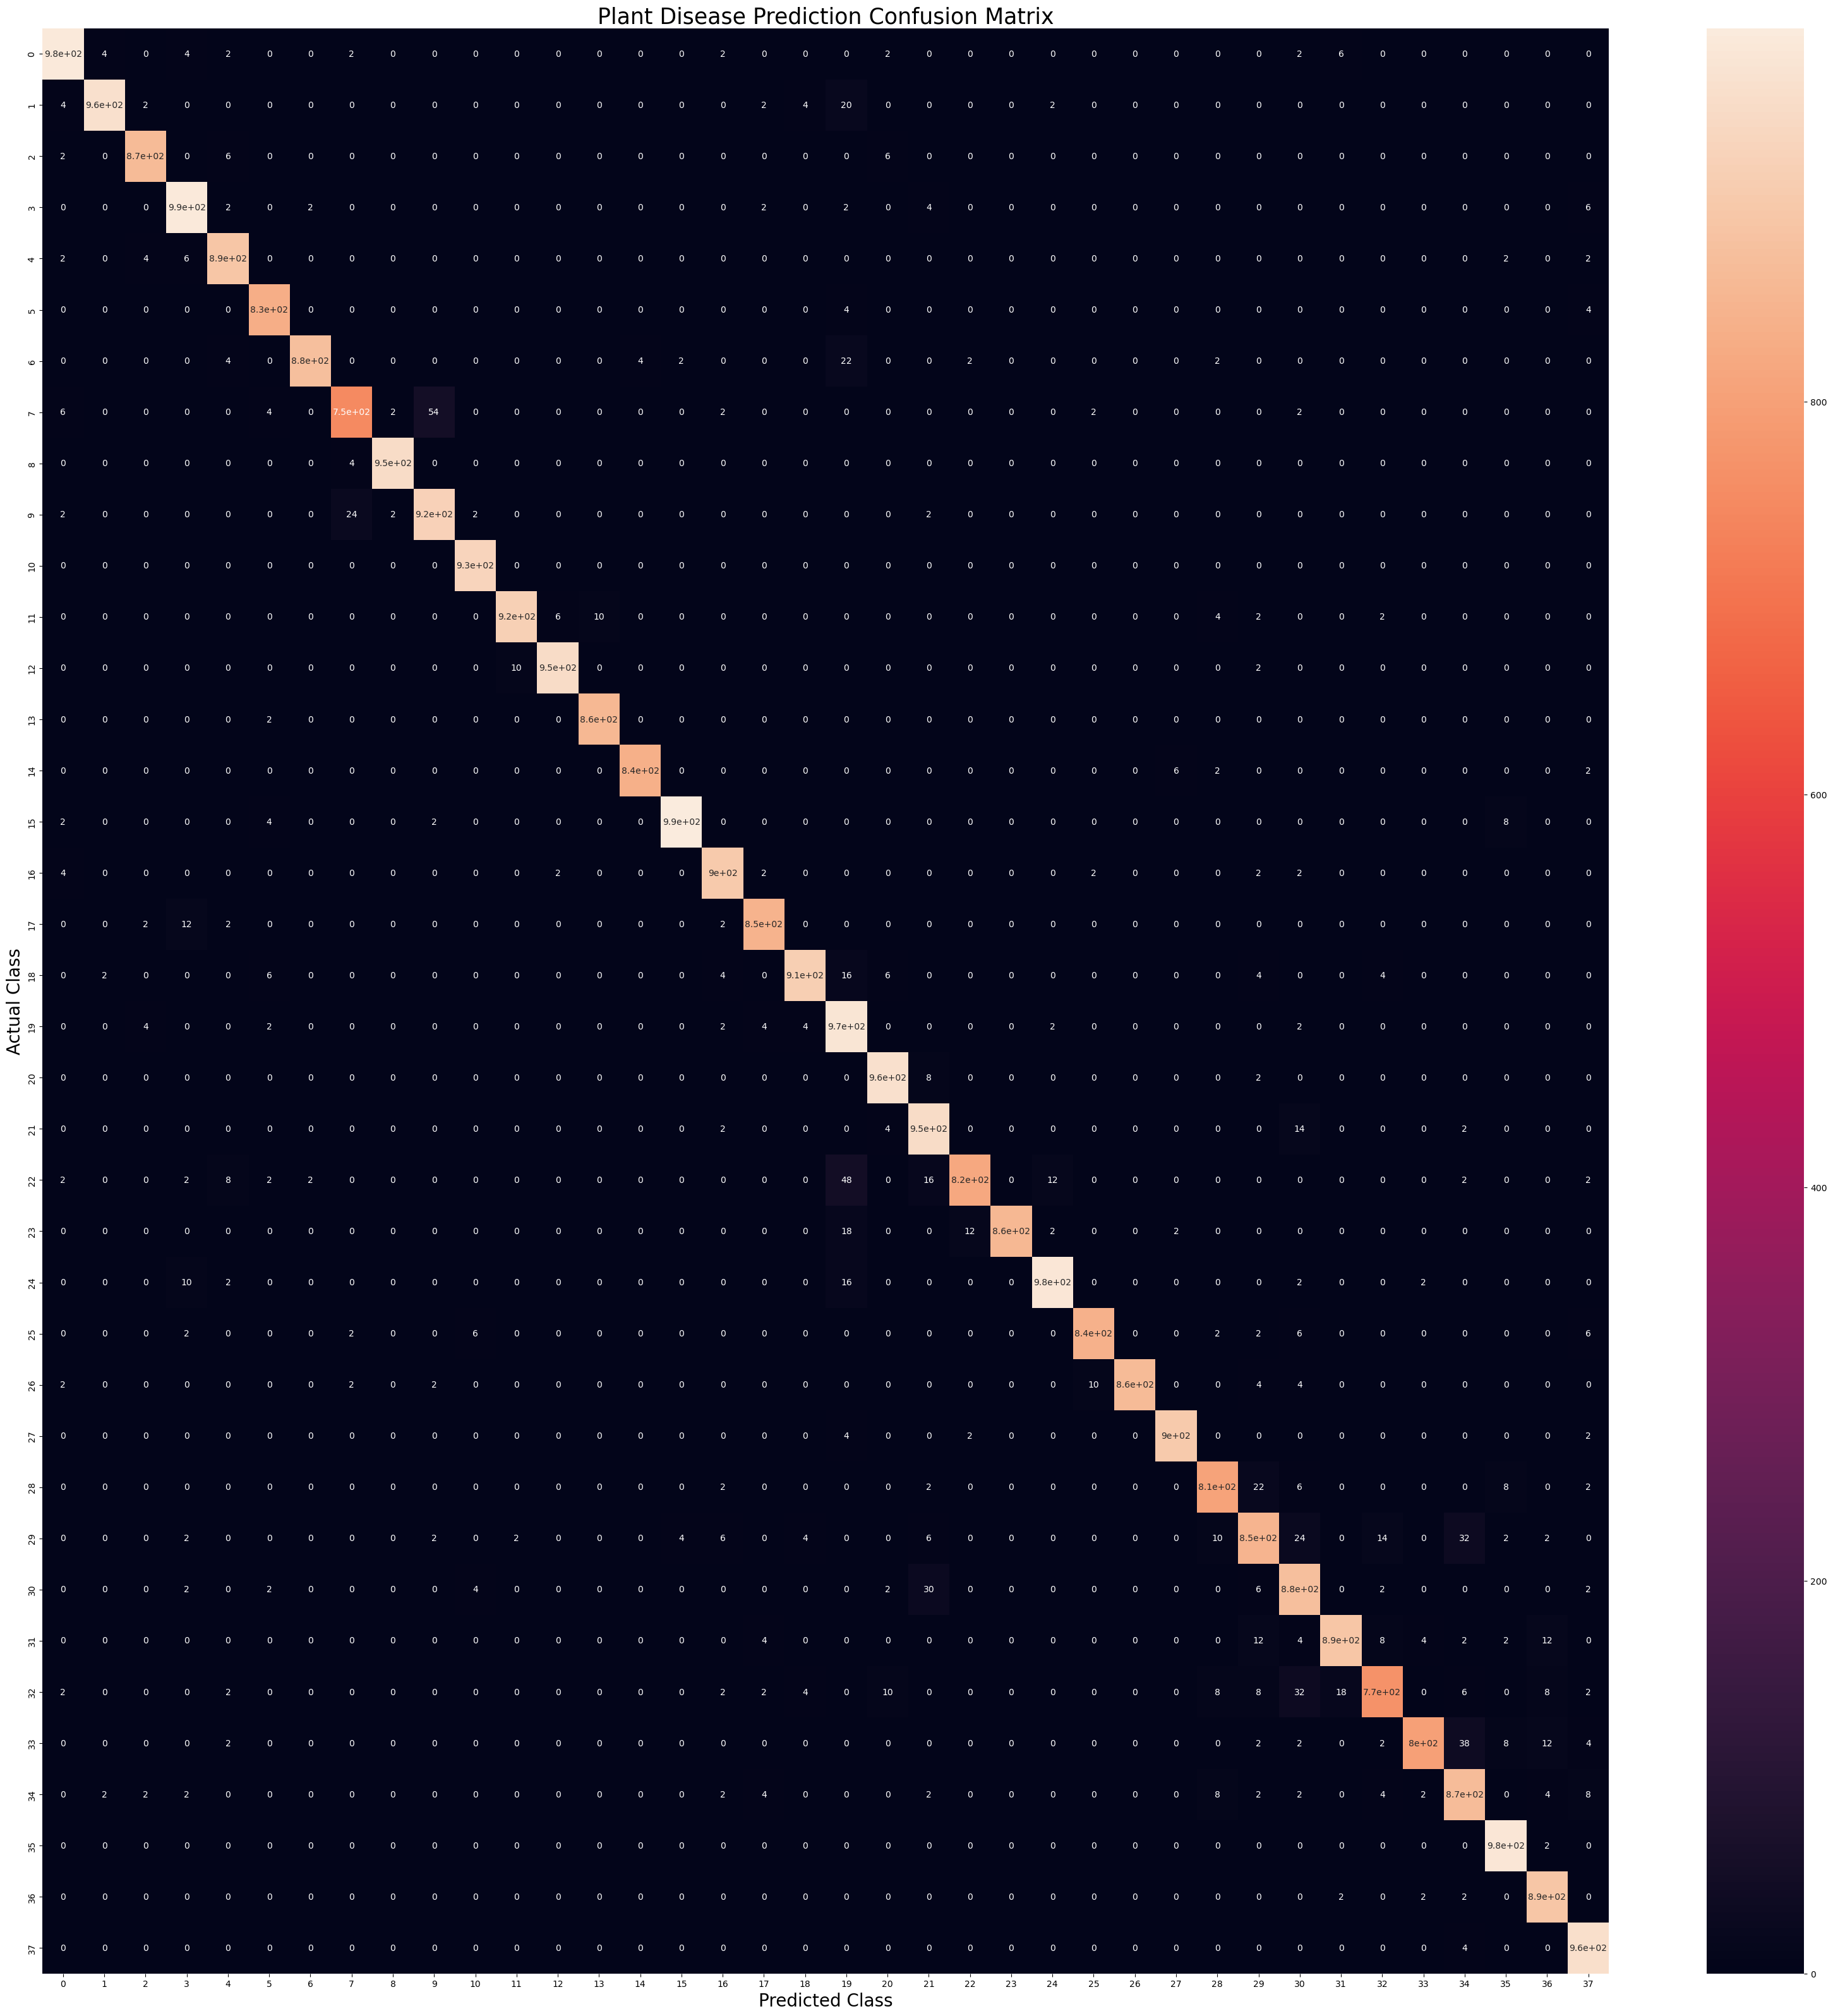

In [104]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()